In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# While handling imbalanced datasets, following undersampling technique, we try to reduce the no. of samples from majority to match the no. of samples in minority so that both majority and minority samples are of equal ratio. further easy to analyse data.
# However as we are trying to reduce the no. of samples to match, there is lot of information being lost & could be a disadvantage.

In [5]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Total no of fraud transactions in this data
fraud = data[data['Class']==1]
len(fraud)

492

In [9]:
# Total no of genuine transactions in this data
genuine = data[data['Class']==0]
len(genuine)

284315

Text(0,0.5,'frequency')

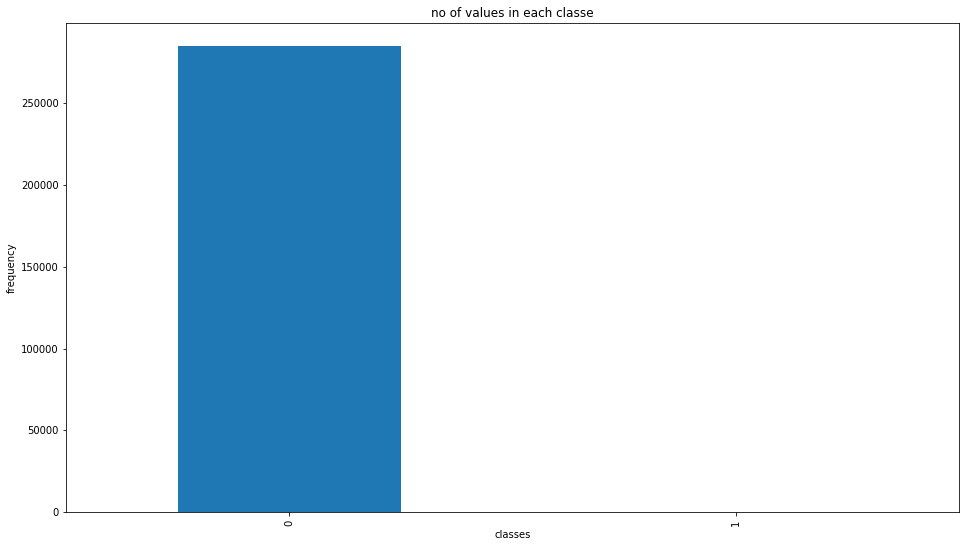

In [10]:
# comparison of no. of samples in fraud & genuine transactions
plt.figure(figsize=(16,9))
counts_classes = pd.value_counts(data['Class'],sort=True)
counts_classes.plot(kind='bar')
plt.title('no of values in each class')
plt.xlabel('classes')
plt.ylabel('frequency')

In [14]:
# We clearly see high data imbalance, whereas it shows more no of genuine cases and modelling this kind of data might be biased. Hence lets follow undersampling procedure.
# Splitting data to x & y
x = data.drop(['Class'],axis=1)
y = data['Class']

In [15]:
# Undersampling
from imblearn import under_sampling
from imblearn.under_sampling import NearMiss
nm = NearMiss(random_state = 42)
x_res,y_res = nm.fit_sample(x,y)
x_res.shape,y_res.shape

((984, 30), (984,))

In [19]:
# Lets compare the dataset shape before  & after sampling process
from collections import Counter
print('original dataset shape{}'.format(Counter(y)))
print('resampled dataset shape{}'.format(Counter(y_res)))

original dataset shapeCounter({0L: 284315, 1L: 492})
resampled dataset shapeCounter({0: 492, 1: 492})


In [ ]:
# Now we could use this dataset for further modelling process.